In [ ]:
from pathlib import Path

import jax
import matplotlib.pyplot as plt
import numpy as np
from dynamical_systems.metrics import (
    cosine_similarity as cosine_similarity,
    maximum_mean_discrepancy as maximum_mean_discrepancy,
    mean_squared_error as mean_squared_error,
    sinkhorn_divergence as sinkhorn_divergence,
)


plt.style.use("matplotlib_utils.styles.dash_gridded")
jax.config.update("jax_enable_x64", True)

SYSTEMS = ("lorenz63", "rossler76", "hyperchen05")
DATASET_PATHS = {
    "lorenz63": {"train": "lorenz63_large.hdf5", "test": "lorenz63_large_test.hdf5"},
    "rossler76": {"train": "rossler76_train.hdf5", "test": "rossler76_test.hdf5"},
    "hyperchen05": {"train": "hyperchen05_train.hdf5", "test": "hyperchen05_test.hdf5"},
}
EXP_TYPES_ALL = (
    "vanilla",
    "jacobian",
    "tangent_evolution",
    "neighborhood",
    "normal",
    "proxy_tangent_evolution",
)
EXP_TYPES = (
    "vanilla",
    "jacobian",
    "tangent_evolution",
    # "proxy_tangent_evolution",
    "neighborhood",
)
COLOR_DICT = dict(
    zip(
        EXP_TYPES_ALL,
        ("royalblue", "limegreen", "darkorange", "orangered", "saddlebrown", "purple"),
    )
)
LABEL_DICT = dict(
    zip(
        EXP_TYPES_ALL,
        (
            "Vanilla",
            "Jacobian matching",
            "Tangent Evolution matching",
            "Neighborhood-based (ours)",
            "Normal-based (ours)",
            "Identity (ours)",
        ),
    )
)

datadir = Path("../../data")

In [4]:
system_dict = {}
for system in ("lorenz63", "hyperchen05"):
    lyapunov_dict = dict()
    for exp_type in ("vanilla", "jacobian", "tangent_evolution"):
        lyapunovs = []
        for dt in (2, 10, 40):
            lya = np.stack(
                [
                    np.load(
                        f"../../results_analysis/{system}/lyapunovs/{exp_type}/downsample={dt}_len=2_key={key}.npy"
                    )
                    for key in (0, 10, 20, 30, 40)
                ],
                axis=0,
            )
            lyapunovs.append(lya)
        lyapunov_dict[exp_type] = np.stack(lyapunovs, axis=0)
    system_dict[system] = lyapunov_dict
system_dict

{'lorenz63': {'vanilla': array([[[ 9.00468135e-01, -1.05848051e-02, -1.08776883e+01],
          [ 9.01146623e-01, -1.25903290e-02, -1.23393762e+01],
          [ 9.00681636e-01, -1.07041389e-02, -1.09805672e+01],
          [ 9.00279937e-01, -9.42381377e-03, -1.08175565e+01],
          [ 9.00209864e-01, -1.00708501e-02, -1.01397549e+01]],
  
         [[ 9.01382577e-01, -1.17753396e-02, -9.67311357e+00],
          [ 9.02451228e-01, -1.41388967e-02, -1.12834043e+01],
          [ 9.02167578e-01, -1.09057887e-02, -1.14826371e+01],
          [ 8.99850564e-01, -1.14843875e-02, -1.06962980e+01],
          [ 8.98839226e-01, -1.24861020e-02, -9.62209453e+00]],
  
         [[ 9.01012064e-01, -1.33650538e-02, -1.20975115e+01],
          [ 8.98273007e-01, -1.77042451e-02, -1.11085515e+01],
          [ 8.99256217e-01, -1.63217656e-02, -1.35235010e+01],
          [ 8.97428102e-01, -1.49414992e-02, -1.20066767e+01],
          [ 9.01886446e-01, -1.43254908e-02, -1.27395815e+01]]]),
  'jacobian': array([

In [30]:
system_dict_ross = {}
for system in ("rossler76",):
    lyapunov_dict = dict()
    for exp_type in ("vanilla", "jacobian"):
        lyapunovs = []
        for dt in (2, 10, 40):
            lya = np.stack(
                [
                    np.load(
                        f"../../results_analysis/{system}/lyapunovs/{exp_type}/downsample={dt}_len=2_key={key}.npy"
                    )
                    for key in (0, 10, 20, 30, 40)
                ],
                axis=0,
            )
            lyapunovs.append(lya)
        system_dict_ross[exp_type] = np.stack(lyapunovs, axis=0)
    for exp_type in ("tangent_evolution",):
        lyapunovs = []
        for dt in (2, 10):
            lya = np.stack(
                [
                    np.load(
                        f"../../results_analysis/{system}/lyapunovs/{exp_type}/downsample={dt}_len=2_key={key}.npy"
                    )
                    for key in (0, 10, 20, 30, 40)
                ],
                axis=0,
            )
            lyapunovs.append(lya)
        system_dict_ross[exp_type] = np.stack(lyapunovs, axis=0)
    # system_dict_ross[system] = lyapunov_dict
nan_array = np.empty((1, 5, 3))
nan_array.fill(np.nan)
system_dict_ross["tangent_evolution"] = np.concatenate(
    [system_dict_ross["tangent_evolution"], nan_array], axis=0
)

In [31]:
lya_true_paths = {
    "lorenz63": "lorenz63_lyapunov_large_test.npz",
    "rossler76": "rossler76_lyapunov_test.npz",
    "hyperchen05": "hyperchen05_lyapunov_test.npz",
}

lya_true_dict = {
    k: np.mean(np.load(datadir / v)["lyas"][:, -1], axis=0)
    for k, v in lya_true_paths.items()
}
lya_true_dict

{'lorenz63': array([ 9.01141444e-01, -1.10490657e-02, -1.45567590e+01]),
 'rossler76': array([ 7.10744081e-02,  7.05924139e-04, -5.39458035e+00]),
 'hyperchen05': array([  0.55517879,   0.14341066,  -0.04180181, -26.07678748])}

In [32]:
lyapunov_dict

{}

In [33]:
system_dict["rossler76"] = system_dict_ross
system_dict

{'lorenz63': {'vanilla': array([[[ 9.00468135e-01, -1.05848051e-02, -1.08776883e+01],
          [ 9.01146623e-01, -1.25903290e-02, -1.23393762e+01],
          [ 9.00681636e-01, -1.07041389e-02, -1.09805672e+01],
          [ 9.00279937e-01, -9.42381377e-03, -1.08175565e+01],
          [ 9.00209864e-01, -1.00708501e-02, -1.01397549e+01]],
  
         [[ 9.01382577e-01, -1.17753396e-02, -9.67311357e+00],
          [ 9.02451228e-01, -1.41388967e-02, -1.12834043e+01],
          [ 9.02167578e-01, -1.09057887e-02, -1.14826371e+01],
          [ 8.99850564e-01, -1.14843875e-02, -1.06962980e+01],
          [ 8.98839226e-01, -1.24861020e-02, -9.62209453e+00]],
  
         [[ 9.01012064e-01, -1.33650538e-02, -1.20975115e+01],
          [ 8.98273007e-01, -1.77042451e-02, -1.11085515e+01],
          [ 8.99256217e-01, -1.63217656e-02, -1.35235010e+01],
          [ 8.97428102e-01, -1.49414992e-02, -1.20066767e+01],
          [ 9.01886446e-01, -1.43254908e-02, -1.27395815e+01]]]),
  'jacobian': array([

Text(0.5, 0.01, '$\\Delta \\bar{t}=\\lambda_{max} \\Delta t$')

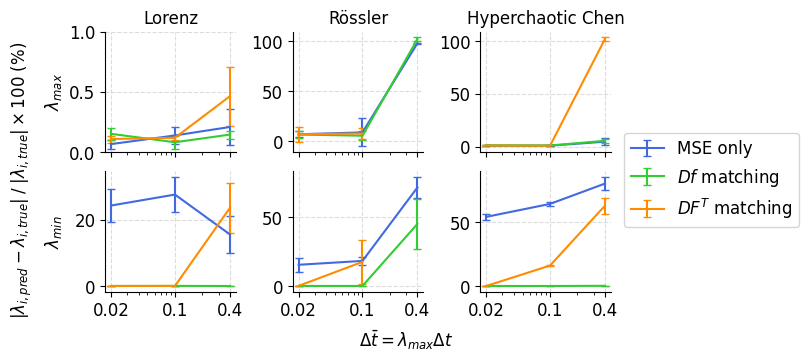

In [45]:
SYSTEM_LABEL_DICT = {
    "lorenz63": "Lorenz",
    "rossler76": "Rössler",
    "hyperchen05": "Hyperchaotic Chen",
}
LABEL_DICT = {
    "vanilla": "MSE only",
    "jacobian": "$Df$ matching",
    "tangent_evolution": "$DF^T$ matching",
    "neighborhood": "Neighborhood (ours)",
}
fig, axes = plt.subplots(2, 3, figsize=(8, 3.5), sharex=True)
for i, (system, lya_true) in enumerate(lya_true_dict.items()):
    for exp_type, lya_pred in system_dict[system].items():
        lya_relerr = np.abs(lya_pred - lya_true) * 100 / np.abs(lya_true)
        lya_relerr_mean = np.mean(lya_relerr, axis=-2)
        lya_relerr_std = np.std(lya_relerr, axis=-2)

        axes[0, i].errorbar(
            np.asarray([2, 10, 40]) * 0.01,
            lya_relerr_mean[:, 0],
            lya_relerr_std[:, 0],
            capsize=3,
            color=COLOR_DICT[exp_type],
            label=LABEL_DICT[exp_type],
        )

        axes[1, i].errorbar(
            np.asarray([2, 10, 40]) * 0.01,
            lya_relerr_mean[:, -1],
            lya_relerr_std[:, -1],
            capsize=3,
            color=COLOR_DICT[exp_type],
            label=LABEL_DICT[exp_type],
        )
    axes[0, i].set_title(SYSTEM_LABEL_DICT[system], fontsize="medium")
axes[0, 0].set_ylim((0, 1))
# axes[0, 1].set_ylim((0, 10))
axes[-1, 0].set_xscale("log")
axes[-1, 0].set_xticks(np.asarray([2, 10, 40]) * 0.01, [0.02, 0.1, 0.4])
fig.supylabel(
    r"$|\lambda_{i, pred}-\lambda_{i, true}|\; /\; |\lambda_{i, true}|\times 100$ (%)",
    fontsize="medium",
)
axes[0, 0].set_ylabel(r"$\lambda_{max}$")
axes[1, 0].set_ylabel(r"$\lambda_{min}$")
fig.align_ylabels()
fig.legend(
    *axes[0, 0].get_legend_handles_labels(),
    loc="outside center right",
    fontsize="medium",
)
fig.supxlabel(
    r"$\Delta \bar{t}=\lambda_{max} \Delta t$",
    fontsize="medium",
)

In [46]:
fig.savefig("../../figures/lyapunov_exponents_Dt.pdf", dpi=1200)